# Machine Learning Final Project

### Overview

- [Step1.Load Basic Libraries and Data](#Step1.Load-Basic-Libraries-and-Data)
- [Step2.EDA](#Step2.EDA)
  - [2.1 資料格式轉換 JSON to Dictionary](#2.1-資料格式轉換-JSON-to-Dictionary)
  - [2.2 Belongs to Collection欄位之探索式資料分析](#2.2-Belongs-to-Collection欄位之探索式資料分析)
  - [2.3 Genres欄位之探索式資料分析](#2.3-Genres欄位之探索式資料分析)
  - [2.4 Production Companies 欄位之探索式資料分析](#2.4-Production-Companies欄位之探索式資料分析)
  - [2.5 Production Countries 欄位之探索式資料分析](#2.5-Production-Countries欄位之探索式資料分析)
  - [2.6 Spoken Language & Original language欄位之探索式資料分析](#2.6-Spoken-Language-&-Original-language欄位之探索式資料分析)
  - [2.7 Keywords 欄位之探索式資料分析](#2.7-Keywords欄位之探索式資料分析)
  - [2.8 Cast 欄位之探索式資料分析](#2.8-Cast欄位之探索式資料分析)
  - [2.9 Crew 欄位之探索式資料分析](#2.9-Crew欄位之探索式資料分析)
  - [2.10 Homepage 欄位之探索式資料分析](#2.10-Homepage欄位之探索式資料分析)
  - [2.11 Status 欄位之探索式資料分析](#2.11-Status欄位之探索式資料分析)
  - [2.12 Title 欄位之探索式資料分析](#2.12-Title欄位之探索式資料分析)
  - [2.13 Overview 欄位之探索式資料分析](#2.13-Overview欄位之探索式資料分析)
  - [2.14 Tagline 欄位之探索式資料分析](#2.14-Tagline欄位之探索式資料分析)
  - [2.15 Release Date 欄位之探索式資料分析](#2.15-Release-Date欄位之探索式資料分析)
  - [2.16 Revenue 欄位之探索式資料分析](#2.16v-Revenue欄位之探索式資料分析)
  - [2.17 Budget 欄位之探索式資料分析](#2.17-Budget欄位之探索式資料分析)
  - [2.18 Popularity 欄位之探索式資料分析](#2.18-Popularity欄位之探索式資料分析)
  - [2.19 Runtime 欄位之探索式資料分析](#2.19-Runtime欄位之探索式資料分析)
  - [2.20 數值特徵與營收間的相關係數分析](#2.20-數值特徵與營收間的相關係數分析)
- [Step3.Data Preprocessing](#Step3.Data-Preprocessing)
- [Step4.Model Selection Training and Evaluation](#Step4.Model-Selection-Training-and-Evaluation)
  - [4.1 Linear Regression](#4.1-Linear-Regression)
  - [4.2 LGBMRegressor](#4.2-LGBMRegressor)
  - [4.3 模型儲存與讀取](#4.3-模型儲存與讀取)

# Step1.Load Basic Libraries and Data

In [1]:
#載入基本套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

#### load new feature data

In [2]:
test = pd.read_csv('data_test.csv', encoding = 'utf8')
test = pd.DataFrame(test)

In [3]:
data_train = pd.read_csv('data_train.csv')
df = pd.DataFrame(data_train) #將 CSV 轉換成 DataFrame 格式
#檢視 df 的前 3 筆資料
pd.set_option("display.max_columns", None) #顯示所有欄位以方便一次查看
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,NaN,39000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0094898,en,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/28/1988,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,"[{'id': 3015, 'name': 'fast food restaurant'},...","[{'cast_id': 1, 'character': 'Prince Akeem / C...","[{'credit_id': '52fe450fc3a36847f80ba1d3', 'de...",288752301
1,NaN,25000000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,tt0091419,en,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'name': 'The Geffen Company', 'id': 2956}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/19/1986,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't feed the plants.,Little Shop of Horrors,"[{'id': 2382, 'name': 'flower'}, {'id': 2642, ...","[{'cast_id': 8, 'character': 'Seymour Krelborn...","[{'credit_id': '52fe43b59251416c7501b029', 'de...",38748395
2,NaN,50000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 53, 'na...",http://www.driveangry3d.com/,tt1502404,en,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/24/2011,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One hell of a ride.,Drive Angry,"[{'id': 4479, 'name': 'bone'}, {'id': 41019, '...","[{'cast_id': 4, 'character': 'Milton', 'credit...","[{'credit_id': '54e07d43c3a368454d0053e5', 'de...",28931401


In [4]:
#檢視 df 的各欄位名稱
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [5]:
#檢視 df 資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
belongs_to_collection    484 non-null object
budget                   2400 non-null int64
genres                   2394 non-null object
homepage                 769 non-null object
imdb_id                  2400 non-null object
original_language        2400 non-null object
original_title           2400 non-null object
overview                 2392 non-null object
popularity               2400 non-null float64
poster_path              2399 non-null object
production_companies     2263 non-null object
production_countries     2350 non-null object
release_date             2400 non-null object
runtime                  2398 non-null float64
spoken_languages         2383 non-null object
status                   2400 non-null object
tagline                  1913 non-null object
title                    2400 non-null object
Keywords                 2183 non-null object
cast                

In [6]:
#檢視 test 資訊
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
belongs_to_collection    37 non-null object
budget                   200 non-null int64
genres                   199 non-null object
homepage                 49 non-null object
imdb_id                  200 non-null object
original_language        200 non-null object
original_title           200 non-null object
overview                 200 non-null object
popularity               200 non-null float64
poster_path              200 non-null object
production_companies     194 non-null object
production_countries     199 non-null object
release_date             200 non-null object
runtime                  200 non-null int64
spoken_languages         199 non-null object
status                   200 non-null object
tagline                  164 non-null object
title                    200 non-null object
Keywords                 179 non-null object
cast                     200 non-null objec

In [7]:
print(df.shape)
print(test.shape)

(2400, 22)
(200, 21)


##### 筆記
執行程式後得知訓練用的 df 計有 2400 筆 22 維的資料，而部分欄位有缺失值。data_test計有 2 筆 21 維的資料，和df不同之處在於缺少 "revenue" 欄位，也就是我們要從 df 的資料中訓練模型來預測data_test中的 "revenue" 。

In [8]:
# 計算並顯示各欄位缺失值(Missing Value)
df.isnull().sum().sort_values(ascending=False) #由多至少排序

belongs_to_collection    1916
homepage                 1631
tagline                   487
Keywords                  217
production_companies      137
production_countries       50
spoken_languages           17
crew                       14
cast                       11
overview                    8
genres                      6
runtime                     2
poster_path                 1
title                       0
imdb_id                     0
budget                      0
popularity                  0
original_language           0
original_title              0
status                      0
release_date                0
revenue                     0
dtype: int64

# Step2.EDA

### 2.1 資料格式轉換 JSON to Dictionary

In [9]:
# 將具有 JSON format 的欄位轉換成 dictionary format
import ast #藉助ast模組可以從語法樹的角度分析原始碼結構。ref : https://www.itread01.com/content/1544847254.html
text_cols = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for col in text_cols:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

df = text_to_dict(df)
test = text_to_dict(test)

In [10]:
print(df.shape)
print(test.shape)

(2400, 22)
(200, 21)


### 2.2 Belongs to Collection欄位之探索式資料分析

In [11]:
# 顯示 'belongs_to_collection'欄位的末 5 筆資料
for i, e in enumerate(df['belongs_to_collection'][-5:]):
    print(i, e)

0 [{'id': 102019, 'name': 'Death Note Collection', 'poster_path': '/jh35G1kYbqEOddhxny6KmRHc9FI.jpg', 'backdrop_path': '/2y42CZ6LTtpJKYRf0dUEFQ13W9f.jpg'}]
1 [{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]
2 [{'id': 87220, 'name': 'Smokey and the Bandit Collection', 'poster_path': '/XYTaoh3qo6gYvJ8UAtnY9icY2Z.jpg', 'backdrop_path': '/ldGGb98U7ytidfLHY5wKazeB6MO.jpg'}]
3 {}
4 {}


In [12]:
# 計算 'belongs_to_collection' 欄位有資料的總數
df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    1916
1     484
Name: belongs_to_collection, dtype: int64

'belongs_to_collection' 欄位有資料的總數為 484 筆。佔總資料數的 20% 。

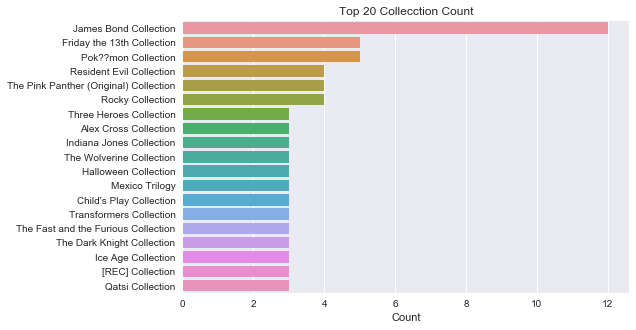

In [13]:
# 繪製數量前20名的電影集
collections = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0).value_counts()[1:20]
fig = plt.figure(figsize=(8, 5))
sns.barplot(collections, collections.index)
plt.xlabel('Count')
plt.title('Top 20 Collecction Count')
plt.show()

<Figure size 576x360 with 0 Axes>

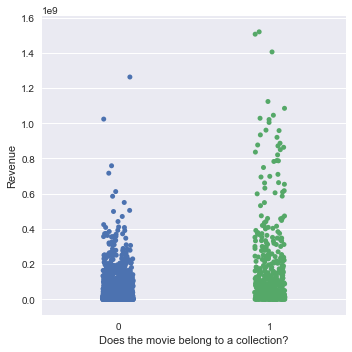

In [14]:
# 繪製是否屬於系列電影的電影數量
df['has_collection'] = df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
plt.figure(figsize=(8, 5))
sns.catplot(x='has_collection', y='revenue', data=df)
plt.xlabel('Does the movie belong to a collection?')
plt.ylabel('Revenue')
plt.show()

##### 筆記
從分布圖來看，屬於電影系列的作品，營收表現較佳。

### 2.3 Genres欄位之探索式資料分析

In [15]:
# 顯示前 5 筆資料
for i, e in enumerate(df['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
1 [{'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]
2 [{'id': 14, 'name': 'Fantasy'}, {'id': 53, 'name': 'Thriller'}, {'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}]
3 [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 53, 'name': 'Thriller'}]
4 [{'id': 35, 'name': 'Comedy'}]


2    793
3    730
1    476
4    300
5     78
6     15
0      6
7      2
Name: genres, dtype: int64


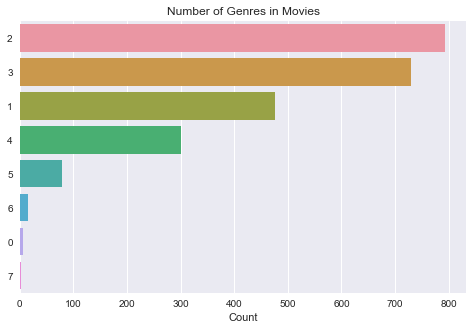

In [16]:
# 計算欄位中唯一值的數量，繪製頻率長條圖
genres_num = df['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
print(genres_num)
fig = plt.figure(figsize=(8, 5))
sns.barplot(genres_num, genres_num.index, orient="h", order=genres_num.sort_values(ascending = False).index)
plt.xlabel('Count')
plt.title('Number of Genres in Movies')
plt.show()

In [17]:
# 擷取每部電影的類型
genres_per = df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
genres_per

0                                       [Comedy, Romance]
1                                 [Horror, Comedy, Music]
2                      [Fantasy, Thriller, Action, Crime]
3                              [Drama, Romance, Thriller]
4                                                [Comedy]
                              ...                        
2395    [Fantasy, Action, Thriller, Science Fiction, M...
2396                        [Adventure, Action, Thriller]
2397                          [Action, Adventure, Comedy]
2398                  [Adventure, Family, Fantasy, Music]
2399                                             [Comedy]
Name: genres, Length: 2400, dtype: object

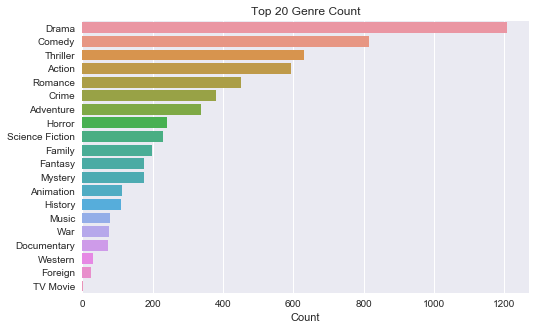

In [18]:
# 顯示最常見的20種類型
from collections import Counter #Counter 是 Python 裡面自帶的函式，可以快速統計 List 內的元件，輸出是Dictionary格式。https://www.itread01.com/articles/1476167108.html
genres_count = Counter([i for j in genres_per for i in j]).most_common()
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in genres_count],[val[0] for val in genres_count])
plt.xlabel('Count')
plt.title('Top 20 Genre Count')
plt.show()

In [19]:
print(df.shape)
print(test.shape)

(2400, 23)
(200, 21)


### 2.4 Production Companies 欄位之探索式資料分析

In [20]:
# 顯示前 5 筆資料
for i, e in enumerate(df['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Eddie Murphy Productions', 'id': 30}]
1 [{'name': 'The Geffen Company', 'id': 2956}, {'name': 'Warner Bros.', 'id': 6194}]
2 [{'name': 'Summit Entertainment', 'id': 491}, {'name': 'Saturn Films', 'id': 831}, {'name': 'Nu Image Films', 'id': 925}, {'name': 'Millennium Films', 'id': 10254}, {'name': 'Michael De Luca Productions', 'id': 11370}]
3 [{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Sandollar Productions', 'id': 5842}, {'name': 'Peter V. Miller Investment Corp.', 'id': 89304}]
4 [{'name': 'Universal Pictures', 'id': 33}, {'name': 'Fuji Television Network', 'id': 3341}, {'name': 'Dentsu', 'id': 6452}, {'name': 'Apatow Productions', 'id': 10105}]


1     609
2     579
3     463
4     250
5     138
0     137
6      92
7      55
8      36
9      21
11      6
10      5
16      2
12      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64


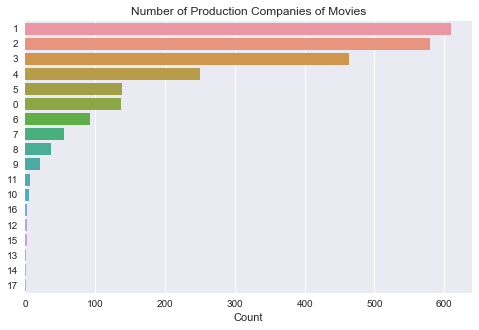

In [21]:
# 計算欄位每部電影的製作公司數量，繪製數量長條圖
companies_num = df['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()
print(companies_num)
fig = plt.figure(figsize=(8, 5))
sns.barplot(companies_num, companies_num.index, orient="h", order=companies_num.sort_values(ascending = False).index)
plt.xlabel('Count')
plt.title('Number of Production Companies of Movies')
plt.show()

##### 筆記
從數據得知，除了獨立製作外，大部分的電影都由2~3家公司合作製作。

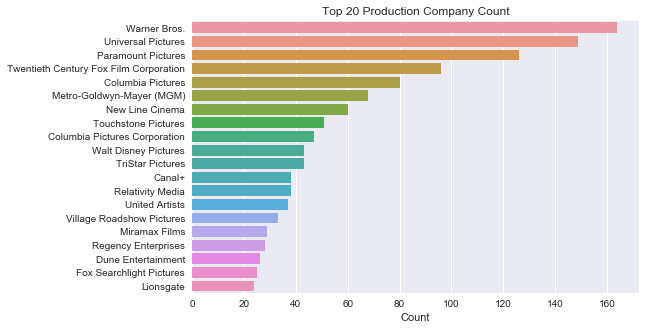

In [22]:
# Show top 20 production company (ranked by number of movies)
companies_per = df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
companies_count = Counter([i for j in companies_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in companies_count],[val[0] for val in companies_count])
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

In [23]:
print(df.shape)
print(test.shape)

(2400, 23)
(200, 21)


### 2.5 Production Countries 欄位之探索式資料分析

In [24]:
# 顯示製作國家欄位的前 5 筆資料
for i, e in enumerate(df['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]
4 [{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [25]:
# 計數
countries_num = df['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()
countries_num

1    1772
2     414
3      96
0      50
4      47
5      17
6       3
8       1
Name: production_countries, dtype: int64

##### 筆記
大部分電影由單一國家製作。

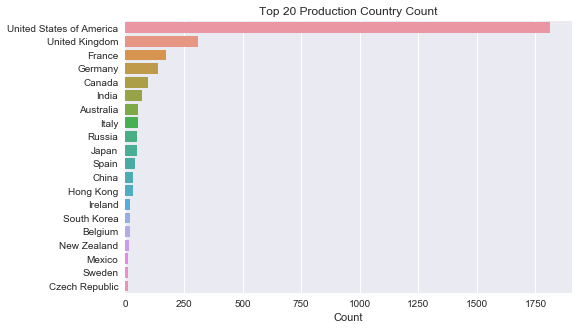

In [26]:
# 顯示電影製作數量前20名的國家
countries_per = df['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
countries_count = Counter([i for j in countries_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in countries_count],[val[0] for val in countries_count])
plt.xlabel('Count')
plt.title('Top 20 Production Country Count')
plt.show()

In [27]:
print(df.shape)
print(test.shape)

(2400, 23)
(200, 21)


### 2.6 Spoken Language &  Original language欄位之探索式資料分析

In [28]:
# 顯示語言欄位的前 5 筆資料
for i, e in enumerate(df['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}]
4 [{'iso_639_1': 'en', 'name': 'English'}]


1    1685
2     429
3     181
4      61
5      17
0      17
6       5
7       3
9       1
8       1
Name: spoken_languages, dtype: int64


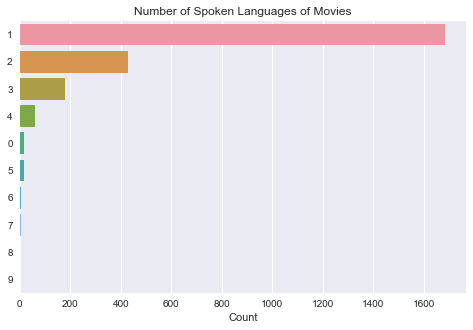

In [29]:
# Unique values and frequency
languages_num = df['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()
print(languages_num)
fig = plt.figure(figsize=(8, 5))
sns.barplot(languages_num, languages_num.index, orient="h", order=languages_num.sort_values(ascending = False).index)
plt.xlabel('Count')
plt.title('Number of Spoken Languages of Movies')
plt.show()

##### 筆記
大部分電影會翻譯成3種以內的語言。

C:\Users\reclu\Anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reclu\Anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


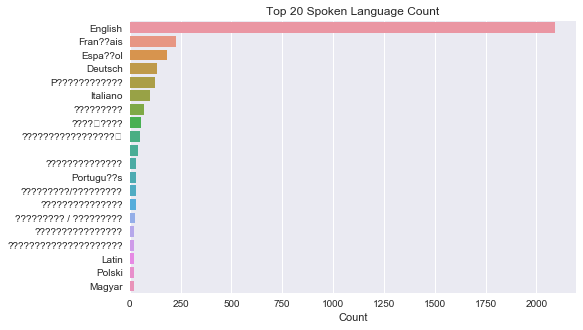

In [30]:
# Show languages which are used frequently
languages_per = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
languages_count = Counter([i for j in languages_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in languages_count],[val[0] for val in languages_count])
plt.xlabel('Count')
plt.title('Top 20 Spoken Language Count')
plt.show()

In [31]:
#計算電影原始語言的種類數量
df['original_language'].value_counts()[:10]

en    2051
fr      60
ru      43
hi      35
es      33
ja      29
it      19
ko      18
de      17
zh      16
Name: original_language, dtype: int64

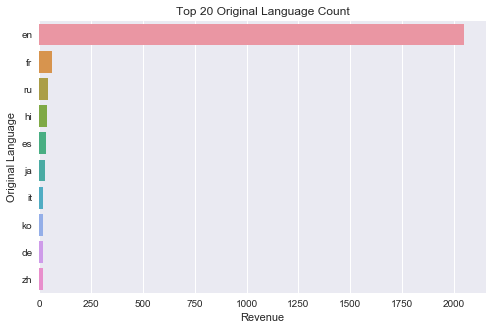

In [32]:
# 繪製電影原始語言的數量
lang_counts = df['original_language'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(lang_counts[:10],lang_counts[:10].index)
plt.title('Top 20 Original Language Count')
plt.ylabel('Original Language')
plt.xlabel('Revenue')
plt.show()

In [33]:
# 計算英語電影的比例
(df['original_language'] == 'en').mean()

0.8545833333333334

<Figure size 576x360 with 0 Axes>

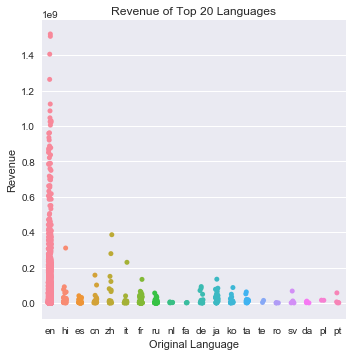

In [34]:
# 繪製不同語言與營收的散佈圖
top20_lang = df.loc[df['original_language'].isin(lang_counts[:20].index),:]
plt.figure(figsize=(8, 5))
sns.catplot(x='original_language', y='revenue', data=top20_lang)
plt.title('Revenue of Top 20 Languages')
plt.xlabel('Original Language')
plt.ylabel('Revenue')
plt.show()

In [35]:
print(df.shape)
print(test.shape)

(2400, 23)
(200, 21)


### 2.7 Keywords 欄位之探索式資料分析

In [36]:
# 顯示前 5 筆資料
for i, e in enumerate(df['Keywords'][:5]):
    print(i, e)

0 [{'id': 3015, 'name': 'fast food restaurant'}, {'id': 3071, 'name': 'prince'}, {'id': 5515, 'name': 'heir to the throne'}, {'id': 11860, 'name': 'fish out of water'}, {'id': 14512, 'name': 'new york city'}, {'id': 167808, 'name': 'fake identity'}, {'id': 179431, 'name': 'duringcreditsstinger'}, {'id': 210589, 'name': 'searching for love'}]
1 [{'id': 2382, 'name': 'flower'}, {'id': 2642, 'name': 'solar eclipse'}, {'id': 2778, 'name': 'florist'}, {'id': 3487, 'name': 'assistant'}, {'id': 3704, 'name': 'plant'}, {'id': 3836, 'name': 'success'}, {'id': 4015, 'name': 'aggression by plant'}, {'id': 5340, 'name': 'investigation'}, {'id': 5801, 'name': 'nerd'}, {'id': 6946, 'name': 'blonde'}, {'id': 8183, 'name': 'carnivorous plant'}, {'id': 9714, 'name': 'remake'}, {'id': 9986, 'name': 'crush'}, {'id': 10181, 'name': 'based on play or musical'}, {'id': 14735, 'name': 'motorcycle'}, {'id': 14773, 'name': 'eclipse'}, {'id': 33491, 'name': 'part animated'}, {'id': 33780, 'name': 'dentist'}, {'

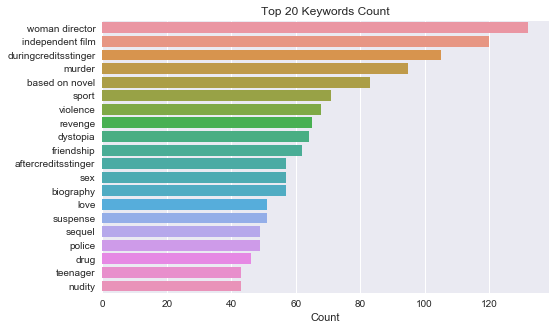

In [37]:
# 計算前20個最常使用的關鍵字，繪製長條圖
keywords_per = df['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
keywords_count = Counter([i for j in keywords_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in keywords_count],[val[0] for val in keywords_count])
plt.xlabel('Count')
plt.title('Top 20 Keywords Count')
plt.show()

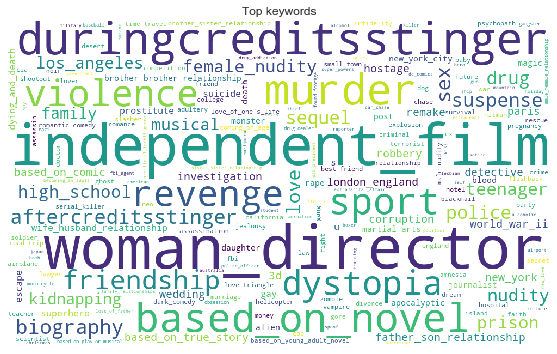

In [38]:
# 繪製文字雲
from wordcloud import WordCloud
plt.figure(figsize = (10, 6))
text = ' '.join(['_'.join(i.split(' ')) for j in keywords_per for i in j])
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()

In [39]:
print(df.shape)
print(test.shape)

(2400, 23)
(200, 21)


### 2.8 Cast 欄位之探索式資料分析

In [40]:
# 顯示前 3 筆資料
for i, e in enumerate(df['cast'][:3]):
    print(i, e)

0 [{'cast_id': 1, 'character': 'Prince Akeem / Clarence / Randy Watson / Saul', 'credit_id': '52fe450fc3a36847f80ba1c1', 'gender': 2, 'id': 776, 'name': 'Eddie Murphy', 'order': 0, 'profile_path': '/bsi706zdqs0KAPdOsqz6AkLNcFF.jpg'}, {'cast_id': 2, 'character': 'Semmi / Extremely Ugly Girl / Morris / Reverend Brown', 'credit_id': '52fe450fc3a36847f80ba1c5', 'gender': 2, 'id': 44994, 'name': 'Arsenio Hall', 'order': 1, 'profile_path': '/czIm2iYMsJszvDZr1aMgBh1El5x.jpg'}, {'cast_id': 3, 'character': 'King Jaffe Joffer', 'credit_id': '52fe450fc3a36847f80ba1c9', 'gender': 0, 'id': 15152, 'name': 'James Earl Jones', 'order': 2, 'profile_path': '/2ZuBf3ip2RXhkiQqGUjbUzAf4Nx.jpg'}, {'cast_id': 4, 'character': 'Cleo McDowell', 'credit_id': '52fe450fc3a36847f80ba1cd', 'gender': 2, 'id': 22384, 'name': 'John Amos', 'order': 3, 'profile_path': '/rg1nwaUNLQ2ibI0HYEzdXJhgWWn.jpg'}, {'cast_id': 18, 'character': 'Lisa McDowell', 'credit_id': '52fe450fc3a36847f80ba21f', 'gender': 1, 'id': 155783, 'nam

In [41]:
#因看多筆Cast資料太雜亂，因此只看1筆來觀察Cast欄位中的資訊
df['cast'][1][1]

{'cast_id': 9,
 'character': 'Audrey',
 'credit_id': '52fe43b59251416c7501b055',
 'gender': 1,
 'id': 13420,
 'name': 'Ellen Greene',
 'order': 1,
 'profile_path': '/nJzE8dS38hxbALr5LZ88BYt8dm0.jpg'}

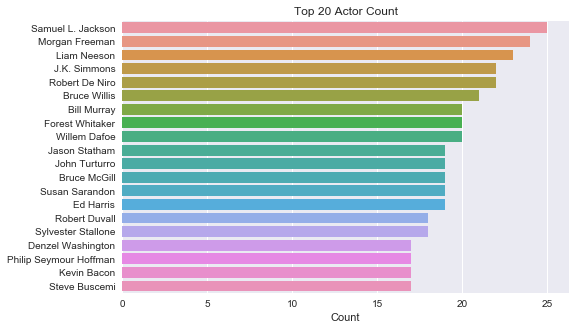

In [42]:
# 繪製前20名最受歡迎演員的長條圖
cast_per = df['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
cast_count = Counter([i for j in cast_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in cast_count],[val[0] for val in cast_count])
plt.xlabel('Count')
plt.title('Top 20 Actor Count')
plt.show()

### 2.9 Crew 欄位之探索式資料分析

In [43]:
# 顯示前 3 筆資料
for i, e in enumerate(df['crew'][:3]):
    print(i, e)

0 [{'credit_id': '52fe450fc3a36847f80ba1d3', 'department': 'Directing', 'gender': 2, 'id': 4610, 'job': 'Director', 'name': 'John Landis', 'profile_path': '/4MVt3MDXZzW2TsiQNvZCGv1ivRx.jpg'}, {'credit_id': '52fe450fc3a36847f80ba1d9', 'department': 'Writing', 'gender': 2, 'id': 57327, 'job': 'Screenplay', 'name': 'David Sheffield', 'profile_path': None}, {'credit_id': '52fe450fc3a36847f80ba1df', 'department': 'Writing', 'gender': 2, 'id': 57328, 'job': 'Screenplay', 'name': 'Barry W. Blaustein', 'profile_path': '/gxV95QsO45TyPSFw9wnfk9U8L79.jpg'}, {'credit_id': '52fe450fc3a36847f80ba1e5', 'department': 'Production', 'gender': 1, 'id': 58148, 'job': 'Executive Producer', 'name': 'Leslie Belzberg', 'profile_path': None}, {'credit_id': '52fe450fc3a36847f80ba1eb', 'department': 'Production', 'gender': 2, 'id': 7184, 'job': 'Producer', 'name': 'George Folsey Jr.', 'profile_path': None}, {'credit_id': '52fe450fc3a36847f80ba1f1', 'department': 'Production', 'gender': 2, 'id': 56189, 'job': 'Ex

In [44]:
#因看多筆Crew資料太雜亂，因此只看1筆來觀察Cast欄位中的資訊
df['crew'][1][1]

{'credit_id': '52fe43b59251416c7501b035',
 'department': 'Writing',
 'gender': 2,
 'id': 62049,
 'job': 'Musical',
 'name': 'Howard Ashman',
 'profile_path': '/cFFiTRB1OBacqzDmiu128mvijdB.jpg'}

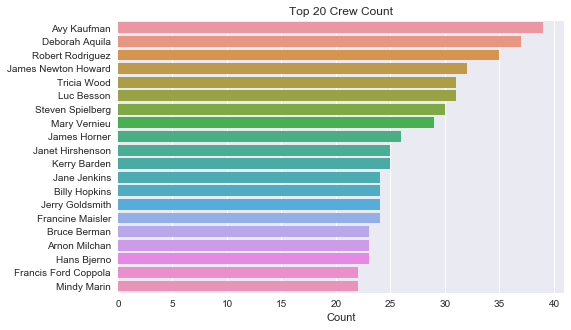

In [45]:
# Show crew who participated in lots of movies
crew_per = df['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
crew_count = Counter([i for j in crew_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in crew_count],[val[0] for val in crew_count])
plt.xlabel('Count')
plt.title('Top 20 Crew Count')
plt.show()

In [46]:
print(df.shape)
print(test.shape)

(2400, 23)
(200, 21)


### 2.10 Homepage 欄位之探索式資料分析

In [47]:
# 計算有官網和無官網的電影數量
df['homepage'].isna().value_counts()

True     1631
False     769
Name: homepage, dtype: int64

In [48]:
# Ranked by frequency
df['homepage'].value_counts().sort_values(ascending=False)[:5]

http://www.transformersmovie.com/                  3
http://www.thehobbit.com/                          2
http://www.thirteenhoursmovie.com/                 1
http://www.sonyclassics.com/loveisallyouneed/      1
http://www.anjaanaanjaani.erosentertainment.com    1
Name: homepage, dtype: int64

<Figure size 576x360 with 0 Axes>

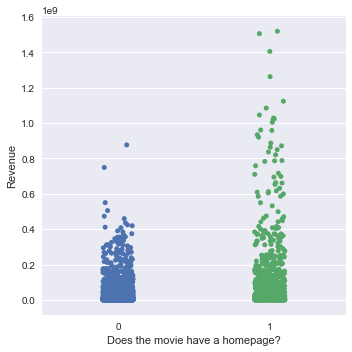

In [49]:
# Show the distribution of revenue
df['has_homepage'] = (1 - df.homepage.isna())
plt.figure(figsize=(8, 5))
sns.catplot(x='has_homepage', y='revenue', data=df)
plt.xlabel('Does the movie have a homepage?')
plt.ylabel('Revenue')
plt.show()

##### 筆記
有官網的電影，營收效果較佳。可聯想到有官網，宣傳效果較佳，對營收有正面幫助。

In [50]:
#test['has_homepage'] = (1 - test.homepage.isna())
#print(df.shape)
#print(test.shape)

### 2.11 Status 欄位之探索式資料分析

In [51]:
#計算電影的發布狀態
df['status'].value_counts()

Released    2398
Rumored        2
Name: status, dtype: int64

##### 筆記
只有2部電影未發行，判斷此欄位對於營收預測沒有幫助。

In [52]:
print(df.shape)
print(test.shape)

(2400, 24)
(200, 21)


### 2.12 Title 欄位之探索式資料分析

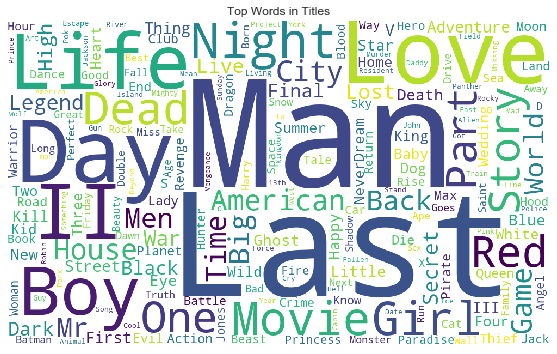

In [53]:
# 繪製 title 的文字雲
text = ' '.join(df['title'].apply(lambda x:x if x is not np.nan else ''))
plt.figure(figsize = (10, 6))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(text)
plt.imshow(wordcloud)
plt.title('Top Words in Titles')
plt.axis("off")
plt.show()

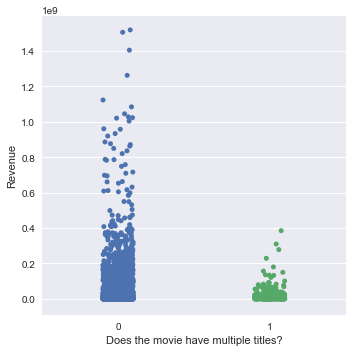

In [54]:
#繪製電影名稱更名與否和營收的關係圖
df['is_title_different'] = 1 - (df['original_title'] == df['title'])
sns.catplot(x="is_title_different", y="revenue", data=df)
plt.xlabel('Does the movie have multiple titles?')
plt.ylabel('Revenue')
plt.show()

##### 筆記
數據顯示，大部份與原始名稱相同的電影營收優於更名的電影。

In [55]:
#test['is_title_different'] = 1 - (test['original_title'] == test['title'])
#print(df.shape)
#print(test.shape)

### 2.13 Overview 欄位之探索式資料分析

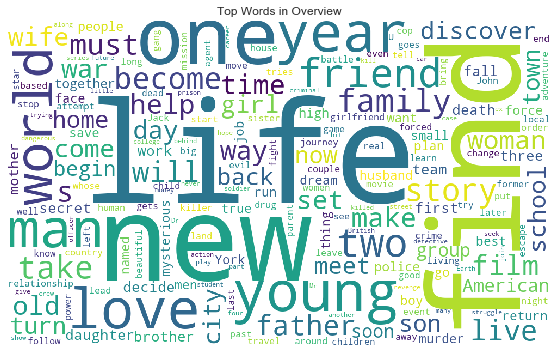

In [56]:
# 繪製 overview 的文字雲
text = ' '.join(df['overview'].apply(lambda x:x if x is not np.nan else ''))
plt.figure(figsize = (10, 6))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(text)
plt.imshow(wordcloud)
plt.title('Top Words in Overview')
plt.axis("off")
plt.show()

In [57]:
print(df.shape)
print(test.shape)

(2400, 25)
(200, 21)


### 2.14 Tagline 欄位之探索式資料分析

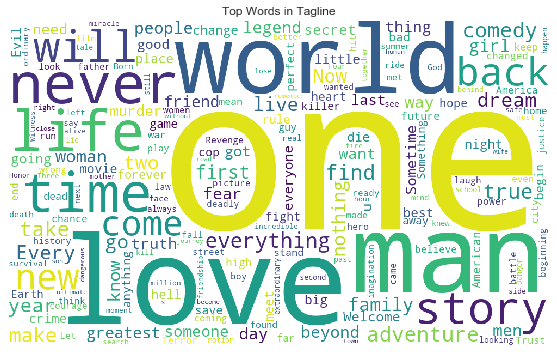

In [58]:
# 繪製 tagline 的文字雲
text = ' '.join(df['tagline'].apply(lambda x:x if x is not np.nan else ''))
plt.figure(figsize = (10, 6))
wordcloud = WordCloud(max_font_size=None, collocations=False, background_color="white", width=1000, height=600).generate(text)
plt.imshow(wordcloud)
plt.title('Top Words in Tagline')
plt.axis("off")
plt.show()

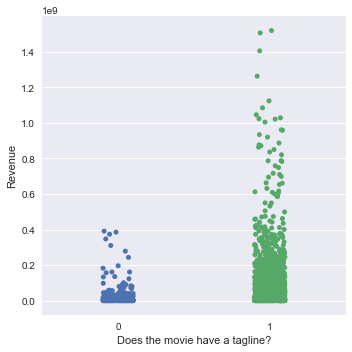

In [59]:
# 具備標語與否的電影與營收的關係圖
df['has_tagline'] = 1 - df['tagline'].isna()
sns.catplot(x="has_tagline", y="revenue", data=df)
plt.xlabel('Does the movie have a tagline?')
plt.ylabel('Revenue')
plt.show()

##### 筆記
有標語的電影，營收標顯明顯優於無標語的電影。

In [60]:
#test['has_tagline'] = 1 - test['tagline'].isna()
#print(df.shape)
#print(test.shape)

### 2.15 Release Date 欄位之探索式資料分析

In [61]:
#顯示前 5 筆日期資訊
df['release_date'].head(5)

0     6/28/1988
1    12/19/1986
2     2/24/2011
3     1/31/1992
4     7/17/2015
Name: release_date, dtype: object

In [62]:
# 擷取日期特徵
def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    #df['release_quarter'] = df['release_date'].dt.quarter
    df['release_dayofweek'] = df['release_date'].dt.dayofweek
    df.drop(columns=['release_date'], inplace=True)
    return df

df = date_features(df)
test= date_features(test)

##### 筆記
release_date欄位已被轉化成年、月、日，3個欄位

In [63]:
df.head(5)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_homepage,is_title_different,has_tagline,release_year,release_month,release_day,release_dayofweek
0,{},39000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0094898,en,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,"[{'id': 3015, 'name': 'fast food restaurant'},...","[{'cast_id': 1, 'character': 'Prince Akeem / C...","[{'credit_id': '52fe450fc3a36847f80ba1d3', 'de...",288752301,0,0,0,1,1988,6,28,1
1,{},25000000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,tt0091419,en,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'name': 'The Geffen Company', 'id': 2956}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't feed the plants.,Little Shop of Horrors,"[{'id': 2382, 'name': 'flower'}, {'id': 2642, ...","[{'cast_id': 8, 'character': 'Seymour Krelborn...","[{'credit_id': '52fe43b59251416c7501b029', 'de...",38748395,0,0,0,1,1986,12,19,4
2,{},50000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 53, 'na...",http://www.driveangry3d.com/,tt1502404,en,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One hell of a ride.,Drive Angry,"[{'id': 4479, 'name': 'bone'}, {'id': 41019, '...","[{'cast_id': 4, 'character': 'Milton', 'credit...","[{'credit_id': '54e07d43c3a368454d0053e5', 'de...",28931401,0,1,0,1,2011,2,24,3
3,{},0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0105391,en,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He needed to trust her with his secret. She ha...,Shining Through,"[{'id': 74, 'name': 'germany'}, {'id': 818, 'n...","[{'cast_id': 2, 'character': 'Ed Leland', 'cre...","[{'credit_id': '58fd30ef925141643c02713f', 'de...",21621000,0,0,0,1,1992,1,31,4
4,{},35000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3152624,en,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,We All Know One.,Trainwreck,"[{'id': 567, 'name': 'alcohol'}, {'id': 2864, ...","[{'cast_id': 4, 'character': 'Amy Townsend', '...","[{'credit_id': '55aa7f0c92514172ef003b26', 'de...",140795793,0,0,0,1,2015,7,17,4


In [64]:
print(df.shape)
print(test.shape)

(2400, 29)
(200, 24)


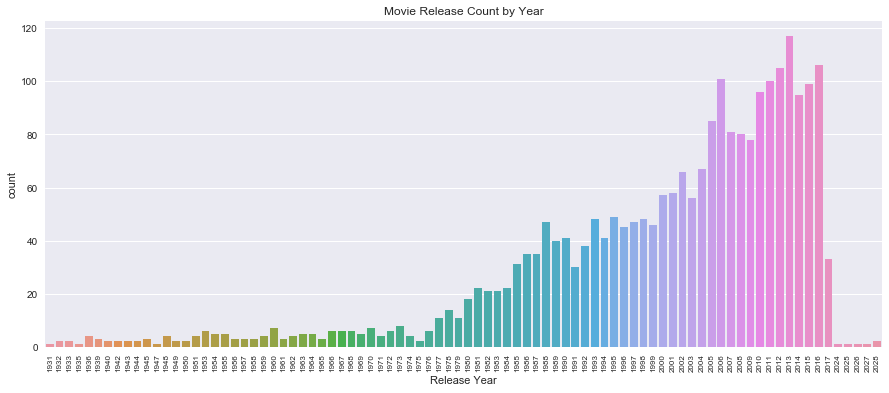

In [65]:
# 繪製各年發行電影數量的長條圖
plt.figure(figsize=(15,6))
sns.countplot(df['release_year'].sort_values())
plt.title("Movie Release Count by Year")
plt.xlabel("Release Year")
plt.xticks(fontsize=8, rotation=90)
plt.show()

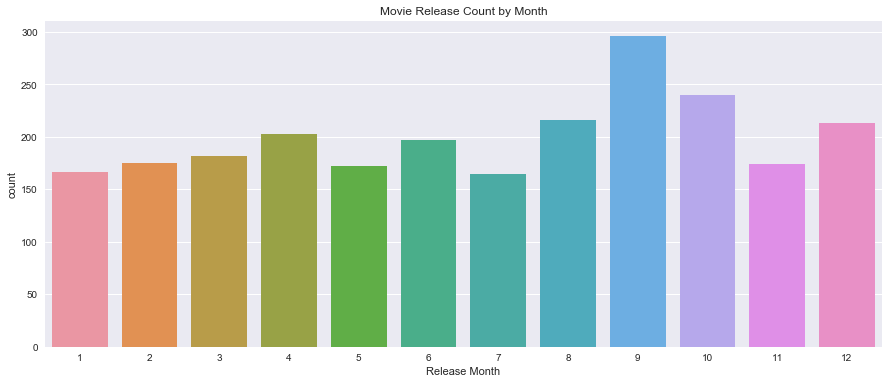

In [66]:
# 繪製各月發行電影數量的長條圖
plt.figure(figsize=(15,6))
sns.countplot(df['release_month'].sort_values())
plt.title("Movie Release Count by Month")
plt.xlabel("Release Month")
plt.show()

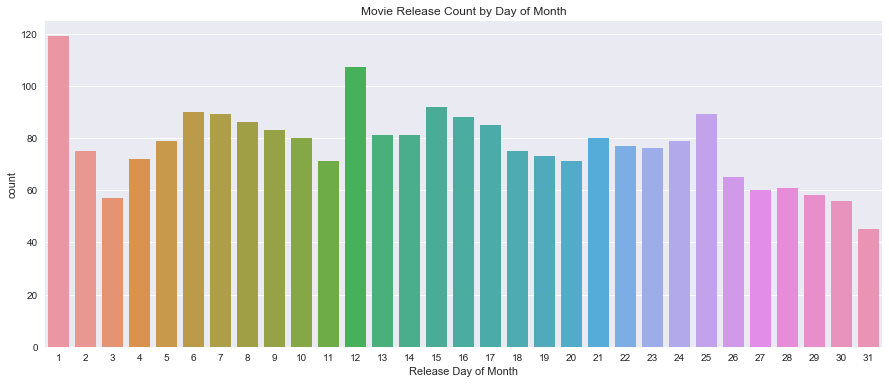

In [67]:
# 繪製每月各天發行電影數量的長條圖
plt.figure(figsize=(15,6))
sns.countplot(df['release_day'].sort_values())
plt.title("Movie Release Count by Day of Month")
plt.xlabel("Release Day of Month")
plt.show()

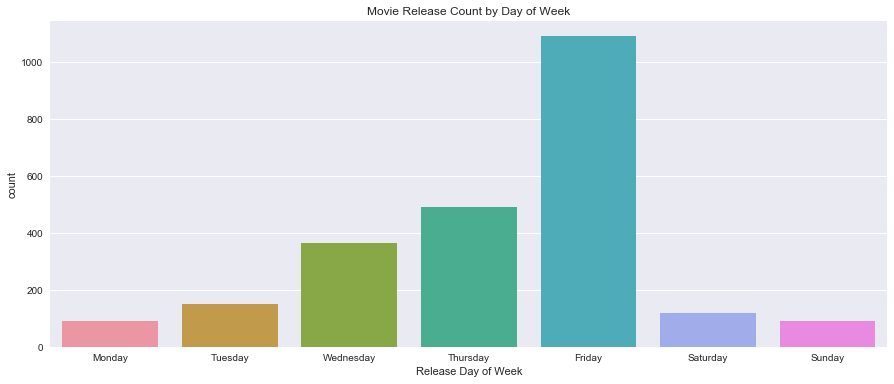

In [68]:
# 繪製每週各天發行電影數量的長條圖
plt.figure(figsize=(15,6))
sns.countplot(df['release_dayofweek'].sort_values())
plt.title("Movie Release Count by Day of Week")
plt.xlabel("Release Day of Week")
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]) # add labels
plt.show()

In [69]:
print(df.shape)
print(test.shape)

(2400, 29)
(200, 24)


### 2.16 Revenue 欄位之探索式資料分析

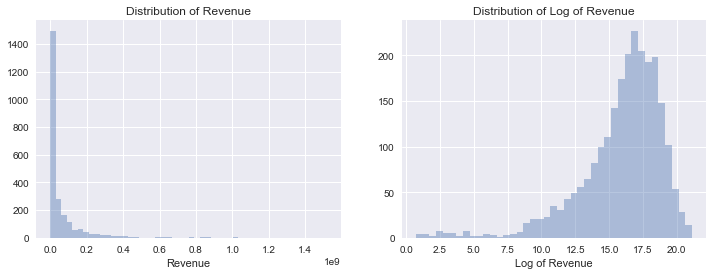

In [70]:
# 營收的分布圖
df['log_revenue'] = np.log1p(df['revenue']) #取log讓營收分布趨近於常態分佈
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['revenue'], kde=False)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.subplot(1, 2, 2)
sns.distplot(df['log_revenue'], kde=False)
plt.title('Distribution of Log of Revenue')
plt.xlabel('Log of Revenue')
plt.show()

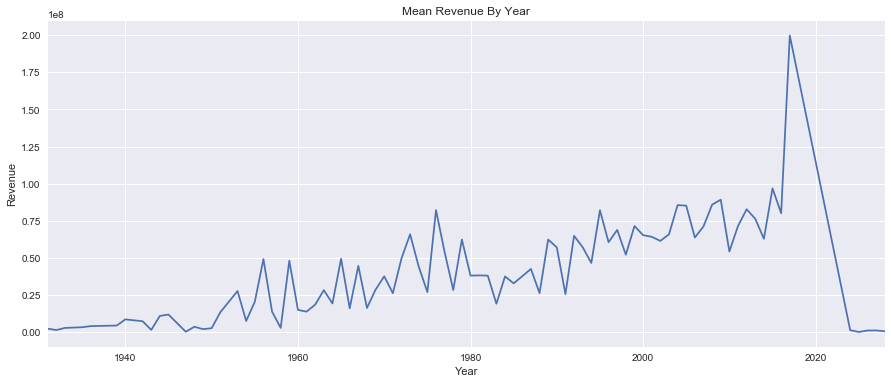

In [71]:
# 每年的電影平均營收
MeanRevenueByYear = df.groupby('release_year')['revenue'].agg('mean')
MeanRevenueByYear.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Year')
plt.show()

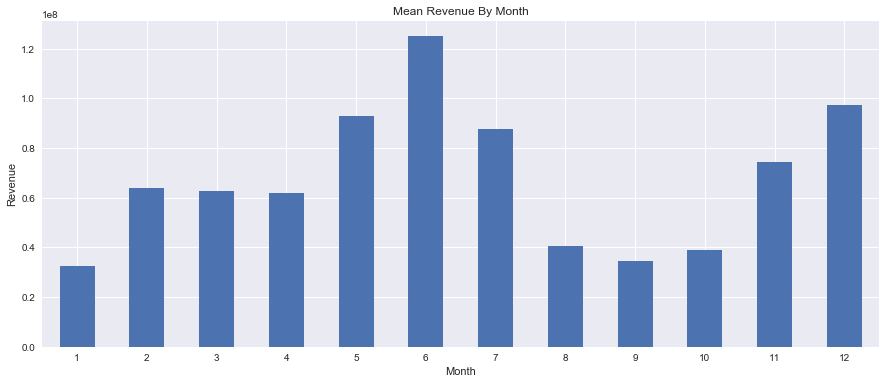

In [72]:
# 每月的電影平均營收
MeanRevenueByMonth = df.groupby('release_month')['revenue'].agg('mean')
MeanRevenueByMonth.plot(figsize=(15,6), kind='bar')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Month')
plt.xticks(rotation=360)
plt.show()

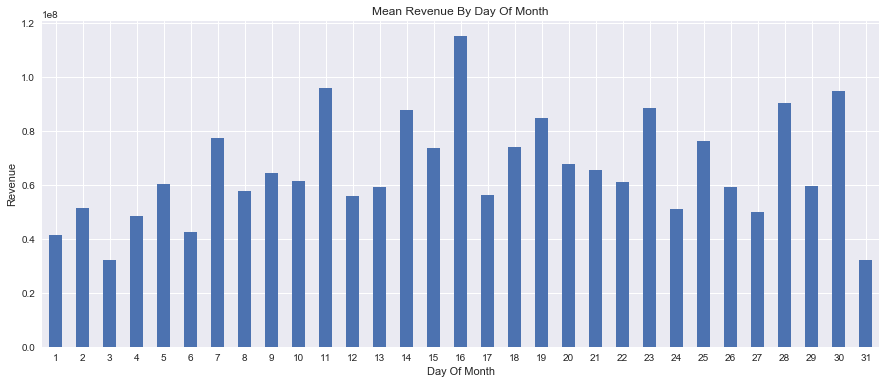

In [73]:
# 每月各天的電影平均營收
MeanRevenueByDayOfMonth = df.groupby('release_day')['revenue'].agg('mean')
MeanRevenueByDayOfMonth.plot(figsize=(15,6), kind='bar')
plt.xlabel('Day Of Month')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Day Of Month')
plt.xticks(rotation=360)
plt.show()

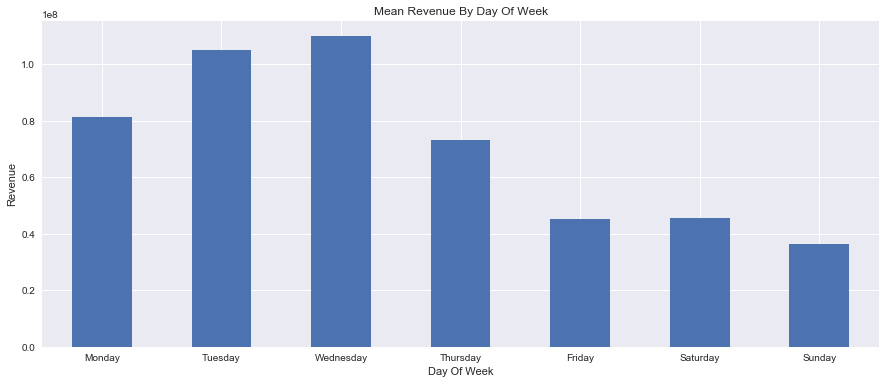

In [74]:
# 每周各天平均營收
MeanRevenueByDayOfWeek = df.groupby('release_dayofweek')['revenue'].agg('mean')
MeanRevenueByDayOfWeek.plot(figsize=(15,6), kind='bar')
plt.xlabel('Day Of Week')
plt.ylabel('Revenue')
plt.title('Mean Revenue By Day Of Week')
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation=360)
plt.show()

### 2.17 Budget 欄位之探索式資料分析

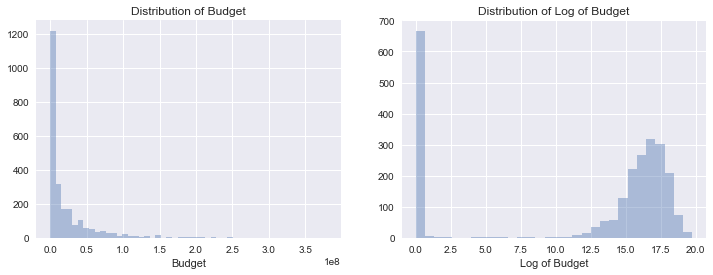

In [75]:
# 繪製預算的分布圖
df['log_budget'] = np.log1p(df['budget']) #取log讓預算分布趨近於常態分佈
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['budget'], kde=False)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.subplot(1, 2, 2)
sns.distplot(df['log_budget'], bins=30, kde=False)
plt.title('Distribution of Log of Budget')
plt.xlabel('Log of Budget')
plt.show()

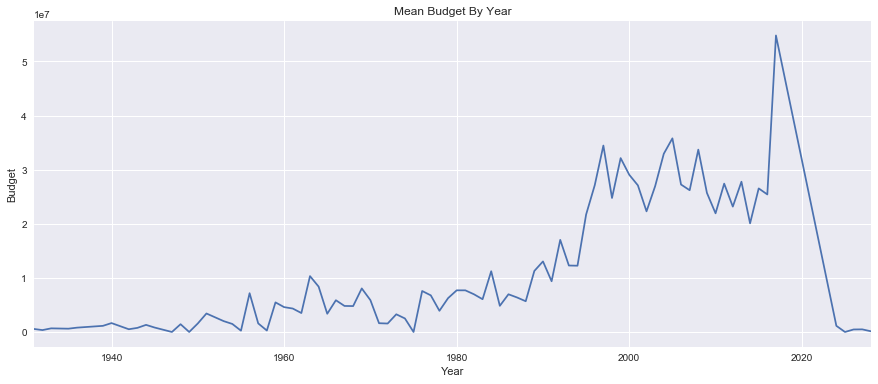

In [76]:
# 每年平均預算
MeanBudgetByYear = df.groupby('release_year')['budget'].agg('mean')
MeanBudgetByYear.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Budget')
plt.title('Mean Budget By Year')
plt.show()

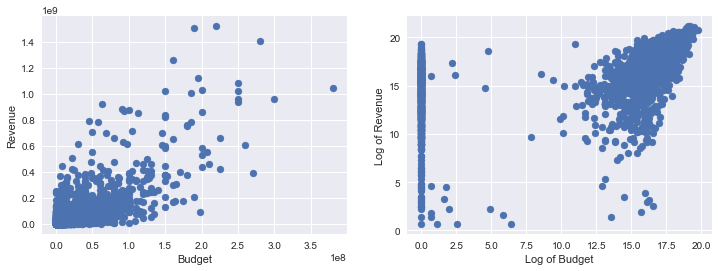

In [77]:
# 繪製預算與營收間的關係圖
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x='budget', y='revenue', data=df)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(x='log_budget', y='log_revenue', data=df)
plt.xlabel('Log of Budget')
plt.ylabel('Log of Revenue')
plt.show()

##### 筆記
預算與營收很明顯地呈現線性關係。

### 2.18 Popularity 欄位之探索式資料分析

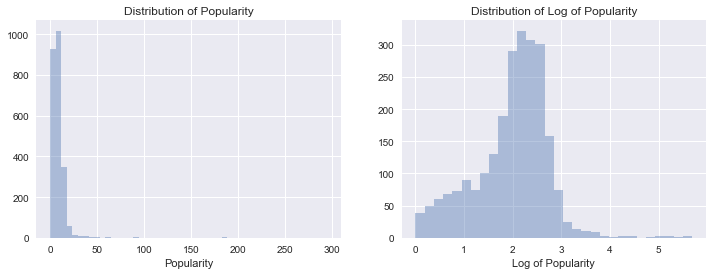

In [78]:
# Distribution of popularity
df['log_popularity'] = np.log1p(df['popularity']) #取log讓觀影人數分布趨近於常態分佈
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['popularity'], kde=False)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.subplot(1, 2, 2)
sns.distplot(df['log_popularity'], bins=30, kde=False)
plt.title('Distribution of Log of Popularity')
plt.xlabel('Log of Popularity')
plt.show()

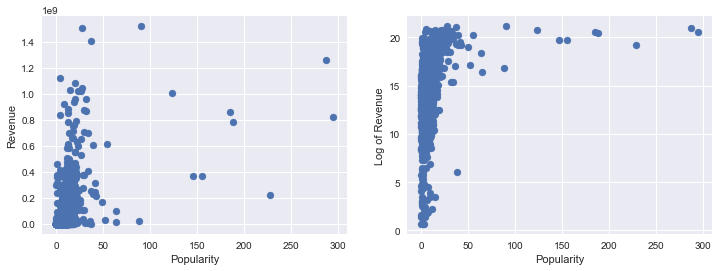

In [79]:
# Relationship between popularity and revenue
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x='popularity', y='revenue', data=df)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(x='popularity', y='log_revenue', data=df)
plt.xlabel('Popularity')
plt.ylabel('Log of Revenue')
plt.show()

##### 筆記
人口與營收無明顯關係。

In [80]:
#test['log_budget'] = np.log1p(test['budget'])
#test['log_popularity'] = np.log1p(test['popularity']) 
#print(df.shape)
#print(test.shape)

### 2.19 Runtime 欄位之探索式資料分析

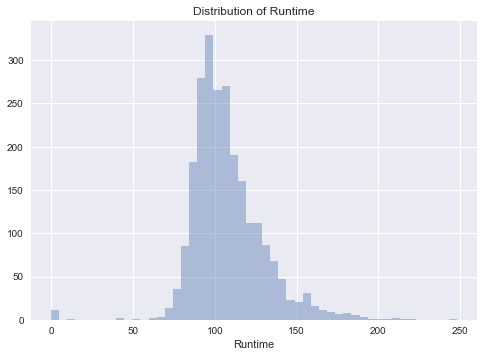

In [81]:
# 繪製 runtime 分布圖
sns.distplot(df['runtime'], kde=False)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.show()

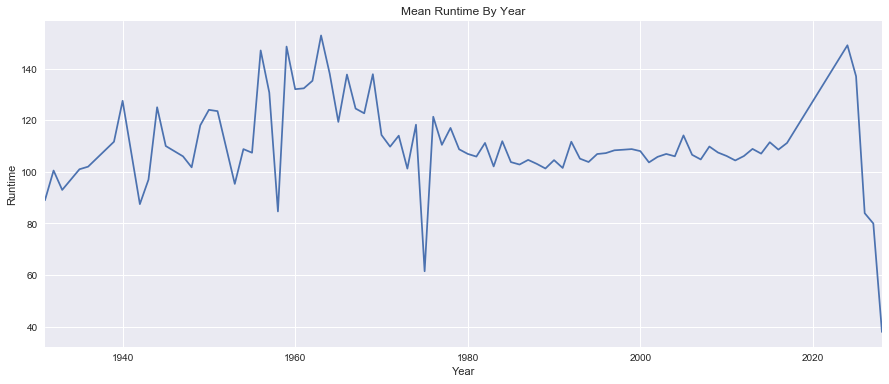

In [82]:
# 繪製每年平均runtime(片長)次數
MeanRuntimeByYear = df.groupby('release_year')['runtime'].agg('mean')
MeanRuntimeByYear.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Mean Runtime By Year')
plt.show()

##### 筆記
隨著電影工業的成熟，自1980開始，runtime都維持在一定的範圍。

In [83]:
#print(df.shape)
#print(test.shape)

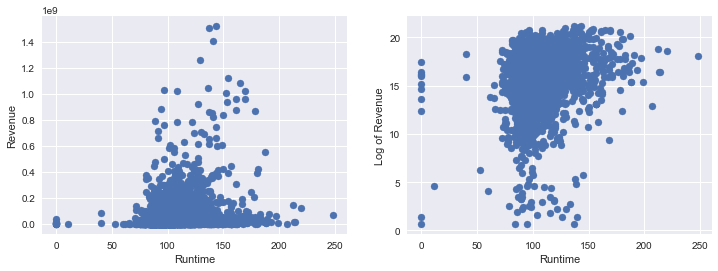

In [84]:
# Relationship between runtime and revenue
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x='runtime', y='revenue', data=df)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(x='runtime', y='log_revenue', data=df)
plt.xlabel('Runtime')
plt.ylabel('Log of Revenue')
plt.show()

##### 筆記
片長時間與營收無明顯關係。

### 2.20 數值特徵與營收間的相關係數分析

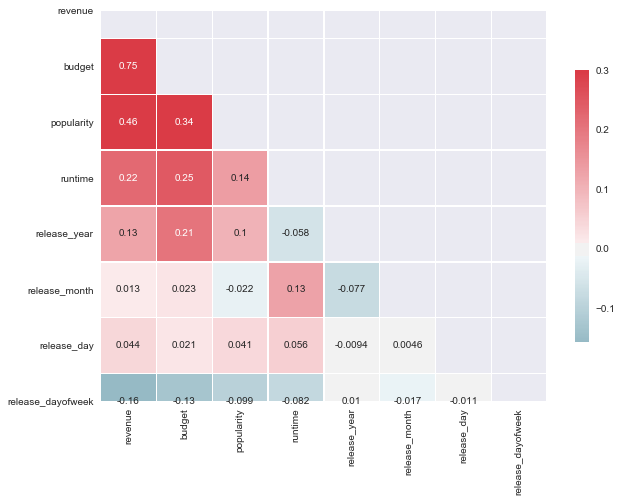

In [85]:
num_vars = ['revenue','budget','popularity','runtime','release_year','release_month','release_day','release_dayofweek']
mask = np.zeros_like(df[num_vars].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[num_vars].corr(), annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

##### 筆記
從相關係數圖表來看，budget, popularity, runtime and realse year和營收有顯著關係，可做為接下來資料前處理的參考。

In [86]:
#print(df.shape)
#print(test.shape)

# Step3.Data Preprocessing

In [87]:
def prepare_data(df):
    
    # belongs to collection
    
    df['has_collection'] = df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
    
    # homepage
    
    df['has_homepage'] = 1 - df['homepage'].isna()
    
    # status
    
    df['is_released'] = (df['status'] == 'Released')*1
       
    # original title
    
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len()
    
    # title
    
    df['title_letter_count'] = df['title'].str.len() 
    df['title_word_count'] = df['title'].str.split().str.len()
    
    # overview
    
    df['overview_letter_count'] = df['overview'].str.len() 
    df['overview_word_count'] = df['overview'].str.split().str.len()
    
    # tagline
    
#    df['has_tagline'] = 1 - df['tagline'].isna()
#    df['tagline_letter_count'] = df['tagline'].str.len()
#    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    # gender of cast
    
    df['genders_0_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    # gender of crew
    
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    # log
    
    df['log_budget'] = np.log1p(df['budget'])
    df['log_popularity'] = np.log1p(df['popularity'])
    
    # create new features about budget
        
    df['ratio_budget_runtime'] = (df['log_budget'] / df['runtime']).replace([np.inf,-np.inf,np.nan],0)
    df['ratio_budget_popularity'] = df['log_budget'] / df['log_popularity']
    df['ratio_budget_year'] = df['log_budget'] / df['release_year'] #
    df['budget_to_mean_year'] = df['log_budget'] / df.groupby('release_year')['log_budget'].transform('mean')
    
    # create new features about popularity
    
    df['ratio_popularity_year'] = df['log_popularity'] / df['release_year']
    df['popularity_to_mean_year'] = df['log_popularity'] / df.groupby('release_year')['log_popularity'].transform('mean')
    
    # create new features about runtime
    
    df['ratio_runtime_year'] = df['runtime'] / df['release_year']
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby('release_year')['runtime'].transform('mean')
                 
    # fill in null values
    
    df.fillna(value=0.0, inplace = True)
    
    return df

In [88]:
df = prepare_data(df)
train = df
test = prepare_data(test)

In [89]:
print(train.shape)
print(test.shape)

(2400, 53)
(200, 49)


In [90]:
# Process dist columns, create dummy variables for values with high frequency

def dist_processing(train, test, col, key): # cast character, crew job/department?
        
    value_list = train[col].apply(lambda x: [i[key] for i in x] if x != {} else [])
    value_count = Counter([i for j in value_list for i in j]).most_common()
    top_list = [m[0] for m in value_count if m[1] > 10] # regard freq>10 as high frequency
        
    train['num_' + col] = train[col].apply(lambda x: len(x) if x != {} else 0)
    train['all_' + col] = train[col].apply(lambda x: ' '.join(sorted([i[key] for i in x])) if x != {} else '')
    test['num_' + col] = test[col].apply(lambda x: len(x) if x != {} else 0)
    test['all_' + col] = test[col].apply(lambda x: ' '.join(sorted([i[key] for i in x])) if x != {} else '')
    
    for p in top_list:
        train[col + '_' + p] = train['all_' + col].apply(lambda x: 1 if p in x else 0)
        test[col + '_' + p] = test['all_' + col].apply(lambda x: 1 if p in x else 0)
    
    train = train.drop([col, 'all_' + col], axis=1)
    test = test.drop([col, 'all_' + col], axis=1)
    
    return train, test
    
text_cols = ['genres', 'production_companies', 'production_countries', 'Keywords', 'cast', 'crew']
    
for col in text_cols:
    train, test = dist_processing(train, test, col, 'name')
    
train, test = dist_processing(train, test, 'spoken_languages', 'iso_639_1')
    
# original language
    
value_count = Counter(train['original_language']).most_common()
top_list = [m[0] for m in value_count if m[1] > 10]

for p in top_list: 
    train['original_language_' + p] = train['original_language'].apply(lambda x: 1 if p in x else 0)
    test['original_language_' + p] = test['original_language'].apply(lambda x: 1 if p in x else 0)

In [91]:
print(train.shape)
print(test.shape)

(2400, 759)
(200, 755)


# OK

In [92]:
# Delete useless columns
train = train.drop(['belongs_to_collection', 'homepage', 'status', 'original_language', 'original_title', 'title', 'overview',
                    'tagline', 'imdb_id', 'poster_path', 'budget', 'popularity', 'revenue', 'is_title_different'], axis=1)
test = test.drop(['belongs_to_collection', 'homepage', 'status', 'original_language', 'original_title', 'title', 'overview',
                  'tagline', 'imdb_id', 'poster_path', 'budget', 'popularity'], axis=1)

In [93]:
print(train.shape)
print(test.shape)

(2400, 745)
(200, 743)


In [94]:
# Remove non-ASCII characters in feature names (for lightGBM)
newnames = []
for col in train.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
train.columns = newnames

newnames = []
for col in test.columns.values:
    encoded_string = col.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    newnames.append(decode_string)
test.columns = newnames

In [95]:
# Check the number of columns in two data sets
print(train.shape)
print(test.shape)

(2400, 745)
(200, 743)


In [96]:
train.head(1)

,runtime,has_collection,has_homepage,has_tagline,release_year,release_month,release_day,release_dayofweek,log_revenue,log_budget,log_popularity,is_released,original_title_letter_count,original_title_word_count,title_letter_count,title_word_count,overview_letter_count,overview_word_count,genders_0_cast,genders_1_cast,genders_2_cast,genders_0_crew,genders_1_crew,genders_2_crew,ratio_budget_runtime,ratio_budget_popularity,ratio_budget_year,budget_to_mean_year,ratio_popularity_year,popularity_to_mean_year,ratio_runtime_year,runtime_to_mean_year,num_genres,genres_Drama,genres_Comedy,genres_Thriller,genres_Action,genres_Romance,genres_Crime,genres_Adventure,genres_Horror,genres_Science Fiction,genres_Family,genres_Fantasy,genres_Mystery,genres_Animation,genres_History,genres_Music,genres_War,genres_Documentary,genres_Western,genres_Foreign,num_production_companies,production_companies_Warner Bros.,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_companies_Twentieth Century Fox Film Corporation,production_companies_Columbia Pictures,production_companies_Metro-Goldwyn-Mayer (MGM),production_companies_New Line Cinema,production_companies_Touchstone Pictures,production_companies_Columbia Pictures Corporation,production_companies_Walt Disney Pictures,production_companies_TriStar Pictures,production_companies_Canal+,production_companies_Relativity Media,production_companies_United Artists,production_companies_Village Roadshow Pictures,production_companies_Miramax Films,production_companies_Regency Enterprises,production_companies_Dune Entertainment,production_companies_Fox Searchlight Pictures,production_companies_Lionsgate,production_companies_BBC Films,production_companies_Working Title Films,production_companies_StudioCanal,production_companies_Summit Entertainment,production_companies_DreamWorks SKG,production_companies_Castle Rock Entertainment,production_companies_Hollywood Pictures,production_companies_Orion Pictures,production_companies_Epsilon Motion Pictures,production_companies_Fox 2000 Pictures,production_companies_Dimension Films,production_companies_Morgan Creek Productions,production_companies_Focus Features,production_companies_Amblin Entertainment,production_companies_Original Film,production_companies_Millennium Films,production_companies_Film4,production_companies_New Regency Pictures,production_companies_Imagine Entertainment,production_companies_Blumhouse Productions,production_companies_The Weinstein Company,production_companies_Screen Gems,production_companies_Spyglass Entertainment,production_companies_France 2 Cin??ma,production_companies_Participant Media,production_companies_TSG Entertainment,production_companies_Legendary Pictures,production_companies_Silver Pictures,production_companies_American Zoetrope,production_companies_Eon Productions,production_companies_Lakeshore Entertainment,production_companies_PolyGram Filmed Entertainment,production_companies_EuropaCorp,production_companies_Studio Babelsberg,production_companies_Happy Madison Productions,num_production_countries,production_countries_United States of America,production_countries_United Kingdom,production_countries_France,production_countries_Germany,production_countries_Canada,production_countries_India,production_countries_Australia,production_countries_Italy,production_countries_Russia,production_countries_Japan,production_countries_Spain,production_countries_China,production_countries_Hong Kong,production_countries_Ireland,production_countries_South Korea,production_countries_Belgium,production_countries_New Zealand,production_countries_Mexico,production_countries_Sweden,production_countries_Czech Republic,num_Keywords,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_sport,Keywords_violence,Keywords_revenge,Keywords_dystopia,Keywords_friendship,Keywords_aftercreditsstinger,Keywords_sex,Keywords_biography,Keywords_love,Keyword

In [97]:
test.head(1)

,runtime,release_year,release_month,release_day,release_dayofweek,has_collection,has_homepage,is_released,original_title_letter_count,original_title_word_count,title_letter_count,title_word_count,overview_letter_count,overview_word_count,genders_0_cast,genders_1_cast,genders_2_cast,genders_0_crew,genders_1_crew,genders_2_crew,log_budget,log_popularity,ratio_budget_runtime,ratio_budget_popularity,ratio_budget_year,budget_to_mean_year,ratio_popularity_year,popularity_to_mean_year,ratio_runtime_year,runtime_to_mean_year,num_genres,genres_Drama,genres_Comedy,genres_Thriller,genres_Action,genres_Romance,genres_Crime,genres_Adventure,genres_Horror,genres_Science Fiction,genres_Family,genres_Fantasy,genres_Mystery,genres_Animation,genres_History,genres_Music,genres_War,genres_Documentary,genres_Western,genres_Foreign,num_production_companies,production_companies_Warner Bros.,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_companies_Twentieth Century Fox Film Corporation,production_companies_Columbia Pictures,production_companies_Metro-Goldwyn-Mayer (MGM),production_companies_New Line Cinema,production_companies_Touchstone Pictures,production_companies_Columbia Pictures Corporation,production_companies_Walt Disney Pictures,production_companies_TriStar Pictures,production_companies_Canal+,production_companies_Relativity Media,production_companies_United Artists,production_companies_Village Roadshow Pictures,production_companies_Miramax Films,production_companies_Regency Enterprises,production_companies_Dune Entertainment,production_companies_Fox Searchlight Pictures,production_companies_Lionsgate,production_companies_BBC Films,production_companies_Working Title Films,production_companies_StudioCanal,production_companies_Summit Entertainment,production_companies_DreamWorks SKG,production_companies_Castle Rock Entertainment,production_companies_Hollywood Pictures,production_companies_Orion Pictures,production_companies_Epsilon Motion Pictures,production_companies_Fox 2000 Pictures,production_companies_Dimension Films,production_companies_Morgan Creek Productions,production_companies_Focus Features,production_companies_Amblin Entertainment,production_companies_Original Film,production_companies_Millennium Films,production_companies_Film4,production_companies_New Regency Pictures,production_companies_Imagine Entertainment,production_companies_Blumhouse Productions,production_companies_The Weinstein Company,production_companies_Screen Gems,production_companies_Spyglass Entertainment,production_companies_France 2 Cin??ma,production_companies_Participant Media,production_companies_TSG Entertainment,production_companies_Legendary Pictures,production_companies_Silver Pictures,production_companies_American Zoetrope,production_companies_Eon Productions,production_companies_Lakeshore Entertainment,production_companies_PolyGram Filmed Entertainment,production_companies_EuropaCorp,production_companies_Studio Babelsberg,production_companies_Happy Madison Productions,num_production_countries,production_countries_United States of America,production_countries_United Kingdom,production_countries_France,production_countries_Germany,production_countries_Canada,production_countries_India,production_countries_Australia,production_countries_Italy,production_countries_Russia,production_countries_Japan,production_countries_Spain,production_countries_China,production_countries_Hong Kong,production_countries_Ireland,production_countries_South Korea,production_countries_Belgium,production_countries_New Zealand,production_countries_Mexico,production_countries_Sweden,production_countries_Czech Republic,num_Keywords,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_sport,Keywords_violence,Keywords_revenge,Keywords_dystopia,Keywords_friendship,Keywords_aftercreditsstinger,Keywords_sex,Keywords_biography,Keywords_love,Keywords_suspense,Keywords_sequ

In [98]:
from sklearn.model_selection import train_test_split #載入拆分資料的模組 train_test_split
X = train.drop(['log_revenue'], axis=1)
y = train['log_revenue']

# Make the order of features consistent (for XGBoost)
X_col = list(X.columns)
test = test.loc[:,X_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=22)

C:\Users\reclu\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [99]:
# Use 10-fold cross-validation
from sklearn.model_selection import KFold
n_fold = 10
folds = list(KFold(n_splits=n_fold, shuffle=True, random_state=22).split(X))

# Step4.Model Selection Training and Evaluation

### 4.1 Linear Regression

In [100]:
print(X_train.shape)
print(X_valid.shape)
print(test.shape)

print(y_train.shape)
print(y_valid.shape)

(2160, 744)
(240, 744)
(200, 744)
(2160,)
(240,)


In [101]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_log_error
#顯示 y_train_pred 的 RMSLE
y_train_pred = lr.predict(X_train)
y_train_pred = np.where(y_train_pred > 0, y_train_pred, 0) #因為 MSLE 無法處理負值，所以將小於0的值轉換成0
train_msle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
print('LinearRegression train_RMSLE=',train_msle)

#顯示 y_valid_pred 的 RMSLE
y_valid_pred = lr.predict(X_valid)
y_valid_pred = np.where(y_valid_pred > 0, y_valid_pred, 0) #因為 MSLE 無法處理負值，所以將小於0的值轉換成0
valid_msle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print('LinearRegression valid_msle=',valid_msle)

LinearRegression train_RMSLE= 0.19364985031835483
LinearRegression valid_msle= 0.2601767829210468


In [102]:
print(train.shape)
print(test.shape)

(2400, 745)
(200, 744)


In [103]:
atest = test
atest['has_tagline'] = test.has_tagline.fillna(0)

#### load new label data

In [104]:
test_rev = pd.read_csv('test_revenue.csv')

In [105]:
#顯示 y_test_pred 的 RMSLE

test_rev =  pd.DataFrame(test_rev)
test_rev['log_revenue'] = np.log1p(test_rev['revenue'])
y_test = test_rev['log_revenue']
y_test.head(1)

y_test_pred = lr.predict(atest)
y_test_pred = np.where(y_test_pred > 0, y_test_pred, 0) #因為 MSLE 無法處理負值，所以將小於0的值轉換成0
test_msle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print('LinearRegression test_msle =',test_msle)

LinearRegression test_msle = 0.34229597095343567


### 4.2 LGBMRegressor

In [106]:
# Train a LGB model
import lightgbm as lgb #https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
params = {'objective': 'regression',
          'num_leaves': 30,
          'min_data_in_leaf': 20,
          'max_depth': 5, #4
          'learning_rate': 0.005,
          'boosting': "gbdt",
          'feature_fraction': 0.9, #0.7
          'bagging_freq': 1,
          'bagging_fraction': 0.9,
          'bagging_seed': 22,
          'metric': 'rmse',
          'lambda_l1': 0.2,
          'verbosity': -1}
model = lgb.LGBMRegressor(**params, n_estimators = 100000, nthread = 4, n_jobs = -1)
model.fit(X_train, y_train, 
          eval_set=[(X_train, y_train), (X_valid, y_valid)], 
          eval_metric='rmse',
          verbose=False, 
          early_stopping_rounds=200)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=22,
              boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', lambda_l1=0.2, learning_rate=0.005,
              max_depth=5, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=20, min_split_gain=0.0,
              n_estimators=100000, n_jobs=-1, nthread=4, num_leaves=30,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [107]:
# Explain the model
import shap #SHAP values (SHapley Additive exPlanations) 是一個Python 的視覺化分析套件，讓我們能輕易的了解我們的模型作出決策的依據。https://medium.com/ai-academy-taiwan/explain-your-machine-learning-model-by-shap-part-1-228fb2a57119
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)

100%|===================| 2151/2160 [01:46<00:00]        

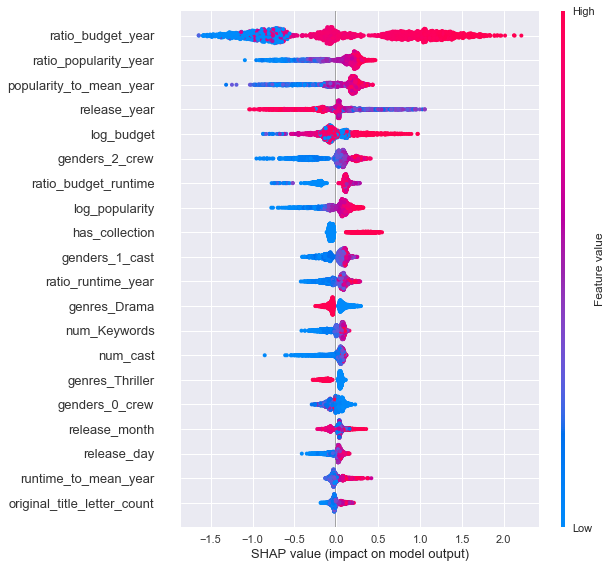

In [108]:
# Create a summary plot
shap.summary_plot(shap_values, X_train)

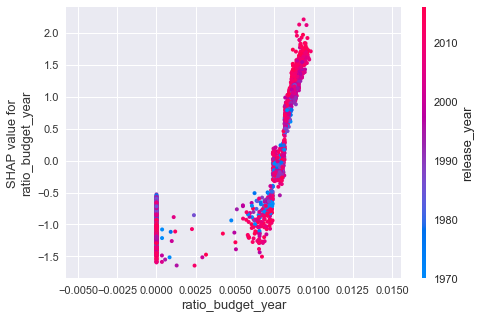

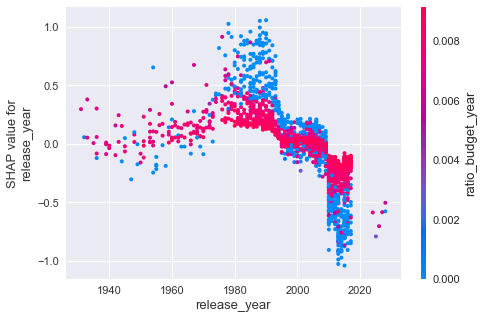

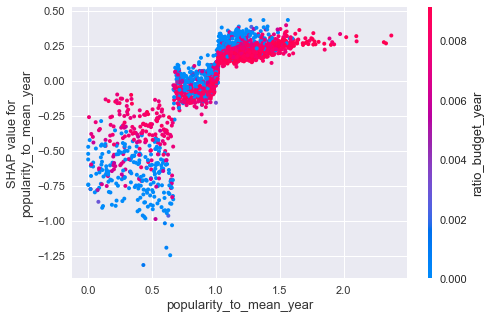

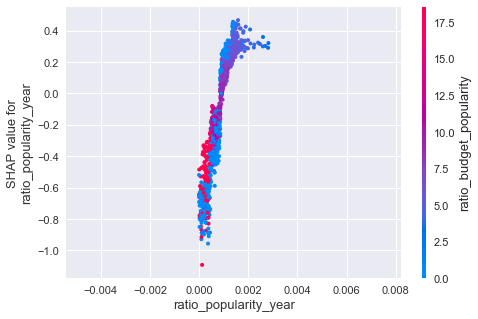

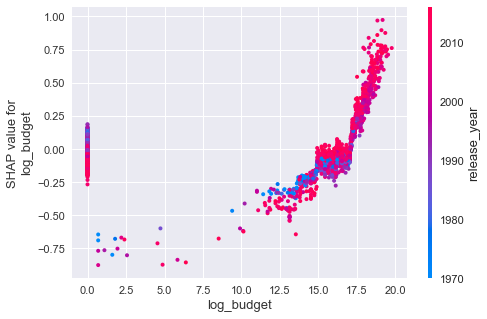

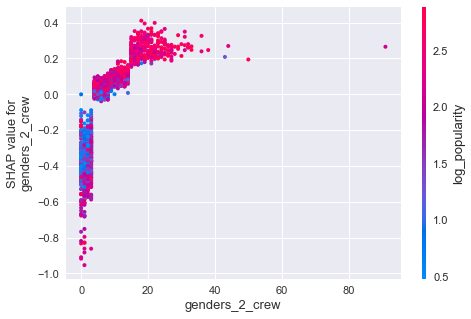

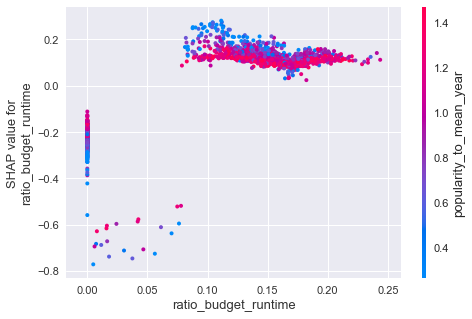

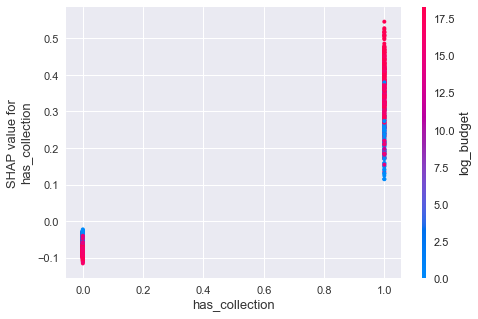

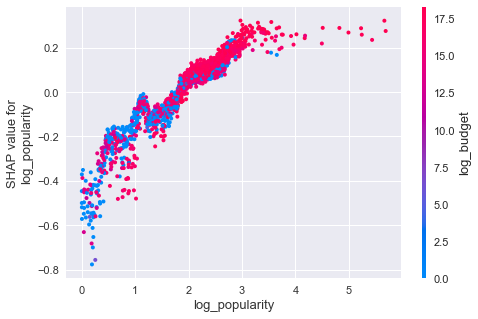

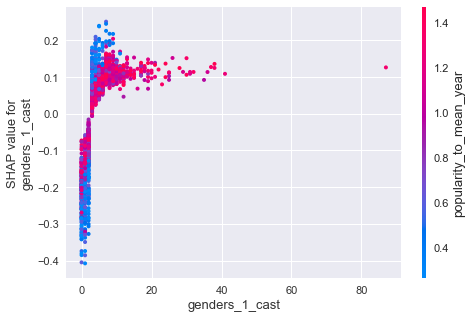

In [109]:
# Create dependence plot for important features
top_cols = X_train.columns[np.argsort(shap_values.std(0))[::-1]][:10]
for col in top_cols:
    shap.dependence_plot(col, shap_values, X_train)

### 筆記
可以看出許多特徵間彼此呈現線性與非線性的關係。

In [110]:
from sklearn.metrics import mean_squared_log_error
#顯示 y_train_pred 的 RMSLE
y_train_pred = model.predict(X_train)
#y_train_pred = np.where(y_train_pred > 0, y_train_pred, 0) #因為 MSLE 無法處理負值，所以將小於0的值轉換成0
train_msle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
print('LGBMRegressor train_RMSLE=',train_msle)

#顯示 y_valid_pred 的 RMSLE
y_valid_pred = model.predict(X_valid)
#y_test_pred = np.where(y_test_pred > 0, y_test_pred, 0) #因為 MSLE 無法處理負值，所以將小於0的值轉換成0
valid_msle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print('LGBMRegressor valid_msle=',valid_msle)

LGBMRegressor train_RMSLE= 0.174357975791238
LGBMRegressor valid_msle= 0.16782031142257833


In [111]:
y_test_pred = model.predict(atest)
y_test_pred = np.where(y_test_pred > 0, y_test_pred, 0) #因為 MSLE 無法處理負值，所以將小於0的值轉換成0
test_msle = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
print('LGBMRegressor test_msle =',test_msle)

LGBMRegressor test_msle = 0.2521740511124726


### 4.3 模型儲存與讀取

In [112]:
#Lightgbm模型保存方式
# 模型保存
from sklearn.externals import joblib
joblib.dump(model, 'lgb.pkl')

#讀取模型
# clf2 = joblib.load('ada.pkl')

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


['lgb.pkl']

In [113]:
joblib.dump(lr, 'lr.pkl')

['lr.pkl']